In [1]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from math import sqrt
from hyperopt import hp
from hyperopt.pyll import scope
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from catboost import CatBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models.hyperopt_model import HyperoptModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr,  spearmanr,  kendalltau

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
print(df.columns)

Index(['NUM_FIRST_POS', 'NUM_SECOND_POS', 'NUM_YEARS_SINCE_FIRST_PUBLICATION',
       'NUM_YEARS_BETWEEN_FIRST_AND_LAST_PUBLICATION', 'NUM_INSTITUTIONS',
       'NUM_TOP500_INSTITUTIONS', 'SHANGHAI_RANK', 'NTU_RANK', 'THE_RANK',
       'SHANGHAI_SCORE', 'NTU_SCORE', 'THE_SCORE', 'AVG_TITLE_LENGTH',
       'AVG_ABSTRACT_LENGTH', 'COLLAB_DEGREE_UNWEIGHTED',
       'COLLAB_DEGREE_WEIGHTED', 'COLLAB_CLOSENESS_UNWEIGHTED',
       'COLLAB_CLOSENESS_WEIGHTED', 'COLLAB_BETWEENNESS_UNWEIGHTED',
       'COLLAB_BETWEENNESS_WEIGHTED', 'COLLAB_PAGERANK_UNWEIGHTED',
       'COLLAB_PAGERANK_WEIGHTED', 'COLLAB_EIGENVECTOR_UNWEIGHTED',
       'COLLAB_EIGENVECTOR_WEIGHTED', 'CIT_OUTDEGREE_UNWEIGHTED',
       'CIT_OUTDEGREE_WEIGHTED', 'CIT_CLOSENESS_UNWEIGHTED',
       'CIT_CLOSENESS_WEIGHTED', 'CIT_BETWEENNESS_UNWEIGHTED',
       'CIT_BETWEENNESS_WEIGHTED', 'TOP_SIM_CORPUS', 'TOP_SIM_UNIFORM',
       'TOP_SIM_PAPERS', 'NUM_TOPICS_GREATER_CORPUS',
       'NUM_TOPICS_GREATER_UNIFORM', 'score'],
      dtyp

In [3]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test=train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 79342
Number of observations in the test data: 19836


Cross-validated scores: [ 0.39731203  0.38223675  0.39702313  0.40396854]
Average R^2 score: 0.39513511446


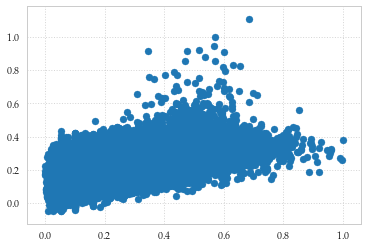

R2Score: 0.395392453677
RMSE: 0.10324490102983806


In [5]:
# Linear Regression 
dfLinear = df.copy()
y = dfLinear['score'].copy()
dfLinear.drop('score', axis=1, inplace=True) 

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfLinear, y, test_size=0.2)

model = linear_model.LinearRegression()

scores = cross_val_score(model, dfLinear, y, cv=4)
print("Cross-validated scores:", scores)
print("Average R^2 score:", scores.mean())

predictions = cross_val_predict(model, dfLinear, y, cv=4)
plt.scatter(y, predictions)
plt.show()

accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

In [6]:
    #some parameters
    DO_LOWESS = False
    hyperopt = False
    # Run Lasso Regression with hyperopt optimization
    lasso = HyperoptModel(train.copy(), test.copy(),'lasso', cv=4, max_evals = 500)
    features = list(df)
    features.remove('score')

    lasso.pipeline = Pipeline([
        ('estimate', linear_model.Lasso(**{'alpha': 0.0006577184991258585}))
    ])
    
    lasso.raw_features = features
    lasso.space = {
        'estimate__alpha': hp.uniform('estimate__alpha', 0, 10),
    }

    if hyperopt:
        lasso.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        lasso.pipeline.fit(X=lasso.X_train, y=lasso.y_train)
        lasso.model = lasso.pipeline
        lasso.stats()
        lasso.plot_feature_importance()
        lasso.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        lasso.qq_plot()

Stats (train | test):
	R^2 score:		0.3566
					0.3591
	RMSE:			0.1065
					0.1065
	Mean error:		0.0818
					0.0815
	Pearson:		0.5995
					0.6021
	Spearman:		0.6139
					0.6156
	KendallTau:		0.4395
					0.4416

Plotting predicted vs. actual ...done

Plotting QQ ...done



In [7]:
    #some parameters
    DO_LOWESS = False
    hyperopt = False
    # Run Ridge Regression with hyperopt optimization
    ridge = HyperoptModel(train.copy(), test.copy(),'ridge', cv=4, max_evals = 500)
    features = list(df)
    features.remove('score')
    ridge.raw_features = features

    ridge.pipeline = Pipeline([
        ('estimate', linear_model.Ridge(**{'alpha': 0.05231780585024858}))
    ])
    
    ridge.space = {
        'estimate__alpha': hp.uniform('estimate__alpha', 0, 1000),
    }

    if hyperopt:
        ridge.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        ridge.pipeline.fit(X=ridge.X_train, y=ridge.y_train)
        ridge.model = ridge.pipeline
        ridge.stats()
        ridge.plot_feature_importance()
        ridge.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        ridge.qq_plot()

Stats (train | test):
	R^2 score:		0.3957
					0.3975
	RMSE:			0.1032
					0.1032
	Mean error:		0.0789
					0.0787
	Pearson:		0.6290
					0.6306
	Spearman:		0.6295
					0.6299
	KendallTau:		0.4557
					0.4565

Plotting predicted vs. actual ...done

Plotting QQ ...done



In [8]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run MLPRegressor with hyperopt optimization
    nn = HyperoptModel(train.copy(), test.copy(),'nn', cv=3, max_evals=500)
    features = list(df)
    features.remove('score')
    nn.raw_features = features

    nn.pipeline = Pipeline([
        ('estimate', MLPRegressor())
    ])
   
    nn.space = {
         'estimate__alpha' : hp.uniform('estimate__alpha', 0.001, 1),
         'estimate__activation' : hp.choice('estimate__activation', ['logistic']), # 'identity', 'logistic', 'tanh', 'relu'
         #'estimate__learning_rate' : hp.choice('estimate__learning_rate', ['constant', 'invscaling', 'adaptive']),
         'estimate__hidden_layer_sizes' : scope.int(hp.uniform('estimate__hidden_layer_sizes', 1, 100)),
         'estimate__solver' : hp.choice('estimate__solver', ['adam']), #'lbfgs', 'sgd',
         #'estimate__max_iter' : scope.int(hp.uniform('estimate__max_iter', 500, 1000))
    }

    if hyperopt:
        nn.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        nn.pipeline.fit(X=nn.X_train, y=nn.y_train)
        nn.model = cat.pipeline
        nn.stats()
        nn.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        nn.plot_feature_importance()
        nn.qq_plot()

Performing parameters optimization...
[1/500]	cv_eval_time=14.59 sec	RMSE=0.114317	R^2=0.253559
[2/500]	cv_eval_time=27.54 sec	RMSE=0.115508	R^2=0.247846
[3/500]	cv_eval_time=19.65 sec	RMSE=0.114405	R^2=0.252001
[4/500]	cv_eval_time=18.46 sec	RMSE=0.118720	R^2=0.195101
[5/500]	cv_eval_time=19.96 sec	RMSE=0.113219	R^2=0.274995
[6/500]	cv_eval_time=22.22 sec	RMSE=0.113127	R^2=0.283493
[7/500]	cv_eval_time=23.23 sec	RMSE=0.117690	R^2=0.213759
[8/500]	cv_eval_time=28.05 sec	RMSE=0.105744	R^2=0.366122
[9/500]	cv_eval_time=19.76 sec	RMSE=0.117595	R^2=0.200021
[10/500]	cv_eval_time=30.48 sec	RMSE=0.108497	R^2=0.318171
[11/500]	cv_eval_time=27.57 sec	RMSE=0.128065	R^2=0.208383
[12/500]	cv_eval_time=25.09 sec	RMSE=0.116823	R^2=0.238643
[13/500]	cv_eval_time=43.08 sec	RMSE=0.114984	R^2=0.247651
[14/500]	cv_eval_time=56.61 sec	RMSE=0.109055	R^2=0.316971
[15/500]	cv_eval_time=41.93 sec	RMSE=0.118252	R^2=0.207360
[16/500]	cv_eval_time=36.18 sec	RMSE=0.115412	R^2=0.250145
[17/500]	cv_eval_time=45.26

[139/500]	cv_eval_time=40.43 sec	RMSE=0.113971	R^2=0.256380
[140/500]	cv_eval_time=34.19 sec	RMSE=0.110884	R^2=0.300804
[141/500]	cv_eval_time=40.40 sec	RMSE=0.116297	R^2=0.231194
[142/500]	cv_eval_time=43.22 sec	RMSE=0.111020	R^2=0.318020
[143/500]	cv_eval_time=50.98 sec	RMSE=0.107795	R^2=0.340522
[144/500]	cv_eval_time=48.58 sec	RMSE=0.106541	R^2=0.339336
[145/500]	cv_eval_time=37.78 sec	RMSE=0.114429	R^2=0.268851
[146/500]	cv_eval_time=42.10 sec	RMSE=0.105292	R^2=0.376015
[147/500]	cv_eval_time=44.06 sec	RMSE=0.106171	R^2=0.366583
[148/500]	cv_eval_time=46.47 sec	RMSE=0.107467	R^2=0.339902
[149/500]	cv_eval_time=47.14 sec	RMSE=0.105766	R^2=0.369865
[150/500]	cv_eval_time=36.25 sec	RMSE=0.105083	R^2=0.375283
[151/500]	cv_eval_time=44.11 sec	RMSE=0.107855	R^2=0.336120
[152/500]	cv_eval_time=48.68 sec	RMSE=0.107634	R^2=0.348126
[153/500]	cv_eval_time=48.60 sec	RMSE=0.105729	R^2=0.363782
[154/500]	cv_eval_time=45.94 sec	RMSE=0.108591	R^2=0.324886
[155/500]	cv_eval_time=39.81 sec	RMSE=0.

[276/500]	cv_eval_time=365.26 sec	RMSE=0.105944	R^2=0.357722
[277/500]	cv_eval_time=290.52 sec	RMSE=0.105498	R^2=0.366956
[278/500]	cv_eval_time=310.84 sec	RMSE=0.107334	R^2=0.346852
[279/500]	cv_eval_time=339.39 sec	RMSE=0.108293	R^2=0.338904
[280/500]	cv_eval_time=326.05 sec	RMSE=0.107712	R^2=0.344893
[281/500]	cv_eval_time=257.15 sec	RMSE=0.106419	R^2=0.359430
[282/500]	cv_eval_time=322.88 sec	RMSE=0.108652	R^2=0.324584
[283/500]	cv_eval_time=314.45 sec	RMSE=0.105877	R^2=0.366348
[284/500]	cv_eval_time=261.57 sec	RMSE=0.117178	R^2=0.236680
[285/500]	cv_eval_time=297.07 sec	RMSE=0.107846	R^2=0.345703
[286/500]	cv_eval_time=289.04 sec	RMSE=0.106350	R^2=0.357138
[287/500]	cv_eval_time=204.02 sec	RMSE=0.105235	R^2=0.374154
[288/500]	cv_eval_time=211.96 sec	RMSE=0.109142	R^2=0.327626
[289/500]	cv_eval_time=76.39 sec	RMSE=0.106829	R^2=0.354487
[290/500]	cv_eval_time=75.52 sec	RMSE=0.116735	R^2=0.229005
[291/500]	cv_eval_time=87.24 sec	RMSE=0.110260	R^2=0.323684
[292/500]	cv_eval_time=76.0

[412/500]	cv_eval_time=57.42 sec	RMSE=0.107662	R^2=0.344094
[413/500]	cv_eval_time=108.48 sec	RMSE=0.106676	R^2=0.354796
[414/500]	cv_eval_time=91.21 sec	RMSE=0.105592	R^2=0.363896
[415/500]	cv_eval_time=49.52 sec	RMSE=0.116723	R^2=0.230064
[416/500]	cv_eval_time=74.98 sec	RMSE=0.106295	R^2=0.357055
[417/500]	cv_eval_time=72.67 sec	RMSE=0.105069	R^2=0.376101
[418/500]	cv_eval_time=81.56 sec	RMSE=0.104670	R^2=0.372065
[419/500]	cv_eval_time=59.07 sec	RMSE=0.105431	R^2=0.350934
[420/500]	cv_eval_time=65.02 sec	RMSE=0.106398	R^2=0.355314
[421/500]	cv_eval_time=72.28 sec	RMSE=0.107666	R^2=0.333717
[422/500]	cv_eval_time=98.05 sec	RMSE=0.109529	R^2=0.346954
[423/500]	cv_eval_time=60.80 sec	RMSE=0.105333	R^2=0.376796
[424/500]	cv_eval_time=68.99 sec	RMSE=0.106589	R^2=0.336910
[425/500]	cv_eval_time=63.71 sec	RMSE=0.106640	R^2=0.361476
[426/500]	cv_eval_time=106.27 sec	RMSE=0.108255	R^2=0.325441
[427/500]	cv_eval_time=85.97 sec	RMSE=0.107978	R^2=0.354225
[428/500]	cv_eval_time=60.00 sec	RMSE=

In [9]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run CatBoostRegressor with hyperopt optimization
    cat = HyperoptModel(train.copy(), test.copy(),'cat', cv=3, max_evals = 30)

    cat.pipeline = Pipeline([
        ('estimate', CatBoostRegressor())
    ])
    
    features = list(df)
    features.remove('score')
    cat.raw_features = features
    
    cat.space = {
        'estimate__iterations': hp.choice('estimate__iterations', [1300]),
        'estimate__loss_function': hp.choice('estimate__loss_function', ['RMSE']),
        'estimate__train_dir': hp.choice('estimate__train_dir', ['outputs/cat']),
        'estimate__thread_count': hp.choice('estimate__thread_count', [4]),
        'estimate__used_ram_limit': hp.choice('estimate__used_ram_limit', [1024 * 1024 * 1024 * 4]),  # 4gb
        'estimate__random_seed': hp.choice('estimate__random_seed', [0]),

        'estimate__learning_rate': hp.loguniform('estimate__learning_rate', -5, 0),
        'estimate__random_strength': hp.choice('estimate__random_strength', [1, 20]),
        'estimate__l2_leaf_reg': hp.loguniform('estimate__l2_leaf_reg', 0, np.log(10)),
        'estimate__bagging_temperature': hp.uniform('estimate__bagging_temperature', 0, 1),
    }

    """
    find the best number of trees (following https://tech.yandex.com/catboost/doc/dg/concepts/parameter-tuning_trees-number-docpage/#parameter-tuning_trees-number)
    need to also substitute the CatBoostRegressor parameters with:
        ('estimate', CatBoostRegressor(iterations=10000, loss_function='RMSE', auto_stop_pval=1e-4, use_best_model=True, train_dir='outputs/cat_trees', verbose=True))
    """
    # num_trees_train, num_trees_eval = train_test_split(train, test_size=0.2, random_state=0)
    # X = num_trees_train[list(filter(lambda column: column in cat.raw_features, cat.train.columns))]
    # y = num_trees_train['score']
    #
    # eval_X = num_trees_eval[list(filter(lambda column: column in cat.raw_features, cat.train.columns))]
    # eval_X = cat.pipeline.named_steps['prepare_features'].fit_transform(eval_X)
    # eval_set = (eval_X, num_trees_eval['score'])
    #
    # cat.pipeline.fit(X=X, y=y, estimate__eval_set=eval_set)
    # cat.model = cat.pipeline
    # print(cat.model.named_steps['estimate'].get_params())
    # cat.model.named_steps['estimate'].save_model('tmp/cat.model'.encode('utf-8'))

    if hyperopt:
        cat.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        cat.pipeline.fit(X=cat.X_train, y=cat.y_train)
        cat.model = cat.pipeline
        cat.stats()
        cat.plot_predicted_vs_actual(do_lowess=DO_LOWESS)
        cat.plot_feature_importance()
        #cat.qq_plot()

Performing parameters optimization...
[1/30]	cv_eval_time=1212.63 sec	RMSE=0.074798	R^2=0.684803
[2/30]	cv_eval_time=1173.94 sec	RMSE=0.073588	R^2=0.691412
[3/30]	cv_eval_time=1223.49 sec	RMSE=0.077930	R^2=0.655151
[4/30]	cv_eval_time=1195.38 sec	RMSE=0.073799	R^2=0.691961
[5/30]	cv_eval_time=1220.11 sec	RMSE=0.074786	R^2=0.683027
[6/30]	cv_eval_time=1199.10 sec	RMSE=0.076942	R^2=0.663870
[7/30]	cv_eval_time=1213.20 sec	RMSE=0.073650	R^2=0.692860
[8/30]	cv_eval_time=1193.09 sec	RMSE=0.073598	R^2=0.692580
[9/30]	cv_eval_time=1228.99 sec	RMSE=0.078058	R^2=0.653668
[10/30]	cv_eval_time=1412.90 sec	RMSE=0.073834	R^2=0.691498
[11/30]	cv_eval_time=1712.06 sec	RMSE=0.079232	R^2=0.645007
[12/30]	cv_eval_time=1582.75 sec	RMSE=0.079768	R^2=0.636972
[13/30]	cv_eval_time=1682.04 sec	RMSE=0.074044	R^2=0.688202
[14/30]	cv_eval_time=1624.80 sec	RMSE=0.076748	R^2=0.665800
[15/30]	cv_eval_time=1642.12 sec	RMSE=0.073417	R^2=0.692984
[16/30]	cv_eval_time=1621.89 sec	RMSE=0.075074	R^2=0.679423
[17/30]	cv_

In [10]:
    #some parameters
    DO_LOWESS = False
    hyperopt = True
    # Run LGBMRegressor with hyperopt optimization
    lgbm = HyperoptModel(train.copy(), test.copy(), 'lgbm', cv=3, max_evals=50)
    lgbm.pipeline = Pipeline([
        ('estimate', lgb.LGBMRegressor())
    ])
    
    features = list(df)
    features.remove('score')
    lgbm.raw_features = features
   
    """ find number of trees """
    # num_trees_train, num_trees_eval = train_test_split(train, test_size=0.2, random_state=0)
    # X = num_trees_train[list(filter(lambda column: column in lgbm.raw_features, lgbm.train.columns))]
    # y = num_trees_train['score']
    #
    # eval_X = num_trees_eval[list(filter(lambda column: column in lgbm.raw_features, lgbm.train.columns))]
    # eval_X = lgbm.pipeline.named_steps['prepare_features'].fit_transform(eval_X)
    # eval_set = (eval_X, num_trees_eval['score'])
    #
    # best = lgbm.pipeline.fit(X=X, y=y, estimate__eval_set=eval_set, estimate__early_stopping_rounds=10)
    # print(best.named_steps['estimate'].best_iteration)

    lgbm.space = {
        'estimate__objective': hp.choice('estimate__objective', ['regression']),
        'estimate__n_estimators': hp.choice('estimate__n_estimators', [400]),
        'estimate__seed': hp.choice('estimate__seed', [0]),

        'estimate__learning_rate': hp.loguniform('estimate__learning_rate', -7, 0),
        'estimate__num_leaves': scope.int(hp.qloguniform('estimate__num_leaves', 1, 7, 1)),
        'estimate__feature_fraction': hp.uniform('estimate__feature_fraction', 0.5, 1),
        'estimate__bagging_fraction': hp.uniform('estimate__bagging_fraction', 0.5, 1),
        'estimate__min_data_in_leaf': scope.int(hp.qloguniform('estimate__min_data_in_leaf', 0, 6, 1)),
        'estimate__min_sum_hessian_in_leaf': hp.loguniform('estimate__min_sum_hessian_in_leaf', -16, 5),
        'estimate__lambda_l1': hp.choice('lambda_l1', [0, hp.loguniform('estimate__lambda_l1_positive', -16, 2)]),
        'estimate__lambda_l2': hp.choice('lambda_l2', [0, hp.loguniform('estimate__lambda_l2_positive', -16, 2)]),
    }

    if hyperopt:
        lgbm.run(do_lowess=DO_LOWESS)
    else:
        # train with default params
        lgbm.pipeline.fit(X=lgbm.X_train, y=lgbm.y_train)
        lgbm.model = lgbm.pipeline
        lgbm.stats()
        lgbm.plot_predicted_vs_actual()
        lgbm.plot_feature_importance()

Performing parameters optimization...
[1/50]	cv_eval_time=210.00 sec	RMSE=0.073773	R^2=0.690231
[2/50]	cv_eval_time=53.22 sec	RMSE=0.112852	R^2=0.277081
[3/50]	cv_eval_time=309.82 sec	RMSE=0.074557	R^2=0.685964
[4/50]	cv_eval_time=718.81 sec	RMSE=0.074071	R^2=0.688371
[5/50]	cv_eval_time=88.80 sec	RMSE=0.074483	R^2=0.684582
[6/50]	cv_eval_time=44.19 sec	RMSE=0.075453	R^2=0.677515
[7/50]	cv_eval_time=24.28 sec	RMSE=0.112600	R^2=0.280478
[8/50]	cv_eval_time=51.66 sec	RMSE=0.097882	R^2=0.455794
[9/50]	cv_eval_time=477.09 sec	RMSE=0.095805	R^2=0.478992
[10/50]	cv_eval_time=70.80 sec	RMSE=0.099756	R^2=0.435164
[11/50]	cv_eval_time=242.25 sec	RMSE=0.076386	R^2=0.668720
[12/50]	cv_eval_time=27.78 sec	RMSE=0.077047	R^2=0.662922
[13/50]	cv_eval_time=49.89 sec	RMSE=0.087083	R^2=0.569506
[14/50]	cv_eval_time=92.21 sec	RMSE=0.074443	R^2=0.685887
[15/50]	cv_eval_time=48.16 sec	RMSE=0.085859	R^2=0.582321
[16/50]	cv_eval_time=82.08 sec	RMSE=0.077012	R^2=0.663039
[17/50]	cv_eval_time=182.11 sec	RMSE=0

In [ ]:
    #Polynomial linear regression 
    degrees = 4
    for d in range(1, degrees+1):
            print("Degree: %s" % d)
            # Create the model, split the sets and fit it
            polynomial_features = PolynomialFeatures(
                degree=d, include_bias=False
            )
            linear_regression = linear_model.LinearRegression()
            model = Pipeline([
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression)
            ])
            dfPoly = df.copy()
            y = dfPoly['score'].copy()
            dfPoly.drop('score', axis=1, inplace=True) 

            # create training and testing vars
            X_train, X_test, y_train, y_test = train_test_split(dfPoly, y, test_size=0.2)

            model.fit(X_train, y_train)
            # Calculate the metrics
            train_prediction = model.predict(X_train)
            test_prediction = model.predict(X_test)
            
            print('Polynomial degree: {}'.format(d))
            print('Stats (train | test):')
            print('\tR^2 score:\t\t%.4f\n\t\t\t\t\t%.4f' % (r2_score(y_train, train_prediction),
                                                        r2_score(y_test, test_prediction)))
            print('\tRMSE:\t\t\t%.4f\n\t\t\t\t\t%.4f' % (mean_squared_error(y_train, train_prediction) ** 0.5,
                                                     mean_squared_error(y_test, test_prediction) ** 0.5))
            print('\tMean error:\t\t%.4f\n\t\t\t\t\t%.4f' % (mean_absolute_error(y_train, train_prediction),
                                                         mean_absolute_error(y_test, test_prediction)))
            print('\tPearson:\t\t%.4f\n\t\t\t\t\t%.4f' % (pearsonr(y_train, train_prediction)[0],
                                                         pearsonr(y_test, test_prediction)[0]))
            print('\tSpearman:\t\t%.4f\n\t\t\t\t\t%.4f' % (spearmanr(y_train, train_prediction)[0],
                                                         spearmanr(y_test, test_prediction)[0]))
            print('\tKendallTau:\t\t%.4f\n\t\t\t\t\t%.4f' % (kendalltau(y_train, train_prediction)[0],
                                                         kendalltau(y_test, test_prediction)[0]))

Degree: 1
Polynomial degree: 1
Stats (train | test):
	R^2 score:		0.3947
					0.4015
	RMSE:			0.1033
					0.1026
	Mean error:		0.0790
					0.0785
	Pearson:		0.6283
					0.6337
	Spearman:		0.6288
					0.6323
	KendallTau:		0.4554
					0.4577
Degree: 2
Polynomial degree: 2
Stats (train | test):
	R^2 score:		0.5070
					0.5124
	RMSE:			0.0933
					0.0926
	Mean error:		0.0703
					0.0699
	Pearson:		0.7120
					0.7158
	Spearman:		0.6920
					0.6924
	KendallTau:		0.5113
					0.5118
Degree: 3
